In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import optimize, signal, interpolate
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_excel("cathet.xlsx")

In [3]:
df = df.loc[2:]

In [4]:
df["t"] = df["t"] - df.loc[2, "t"]
df["V"] = df["V"] - df.loc[2, "V"]

In [5]:
df[:5]

,t,V
2,0,0.000000
3,39,0.000008
4,131,0.000027
5,184,0.000038
6,214,0.000044


In [6]:
df.to_csv("cathet.csv", index=False)

In [8]:
R = 8.31446261815324  # J/mol.K
T0 = 292.05           # K
p0 = 101600           # Pa
V = 190e-6            # m3 of isopropanol
m = 2.7677            # g of Raney Nickel
rho = 785             # kg/m³
M = 60.1              # g/mol
n0 = 1000*rho*V/M     # mol

In [9]:
n0

2.4816971713810316

In [10]:
df["xi"] = p0*df["V"]/(R*T0)
df["A"] = (n0 - df["xi"])/V
df["B"] = (df["xi"])/V

In [15]:
t = df["t"].values
xi = df["xi"].values

In [16]:
interpolator = interpolate.interp1d(t, xi)

In [19]:
tlin = np.arange(t.min(), t.max(), 1)

In [22]:
xilin = interpolator(tlin)

In [40]:
xs = signal.savgol_filter(xilin, 501, 3)

In [41]:
dxs = signal.savgol_filter(xilin, 501, 3, deriv=1)

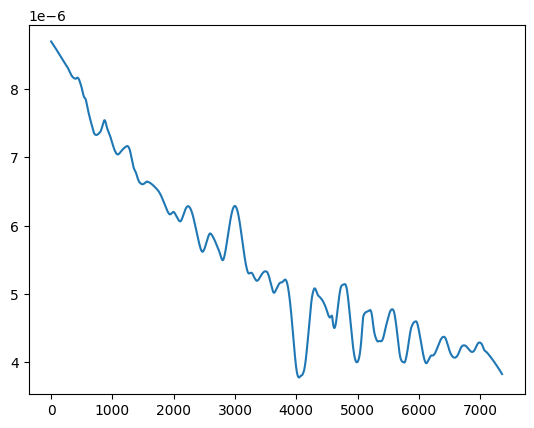

In [42]:
fig, axe = plt.subplots()
axe.plot(tlin, dxs)

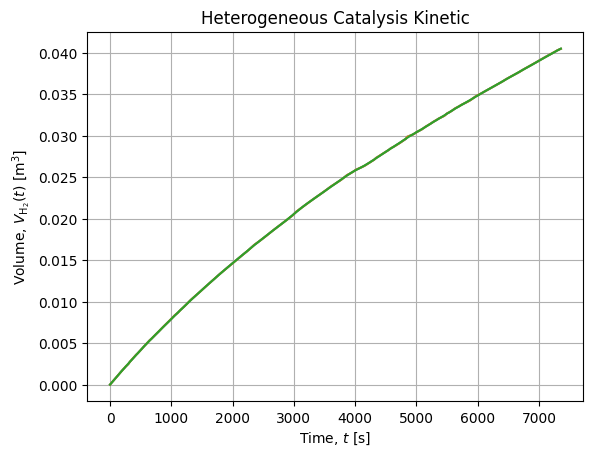

In [43]:
fig, axe = plt.subplots()
axe.plot(df["t"], df["xi"])
axe.plot(tlin, xilin)
axe.plot(tlin, xs)
axe.set_title("Heterogeneous Catalysis Kinetic")
axe.set_xlabel("Time, $t$ $[\mathrm{s}]$")
axe.set_ylabel("Volume, $V_\mathrm{H_2}(t)$ $[\mathrm{m^3}]$")
axe.grid()

In [45]:
A = (n0 - xs)/V
B = xs/V

In [48]:
C = np.stack([A, B])

In [61]:
r = model(C, 1e-2, 1e5, 1e7)

In [62]:
def model(x, k1, a, b):
    return k1*(a*x[0])/(a*x[0] + b*x[1])

In [72]:
popt, pcov = optimize.curve_fit(model, C, r, p0=[1e-2, 1e5, 1e5])

In [73]:
popt, pcov

(array([1.00000000e-02, 2.13597912e+07, 2.13597912e+09]),
 array([[1.10057822e-39, 6.52471237e-24, 6.52471764e-22],
        [6.52471183e-24, 5.29329795e-06, 5.29329797e-04],
        [6.52471703e-22, 5.29329797e-04, 5.29329799e-02]]))

In [74]:
popt[2]/popt[1]

100.0